<a href="https://colab.research.google.com/github/Asma-malica/ML/blob/main/ML_Logistic_Regression_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Linear Regression --> predicting continuous value

# Classification --> predicting categorical value (sigmoid/logit line)


#types of classification

1. binary (2 class label)

2. multiclass


Instead of R square --> Most likely

sigmoid(z) = 1/(1+ e^-z)

sigmoid range (0 to 1)

e = Euler's number = 2.71828

y = mx + b

y= 1/(1+ e^-(mx + b))

converting linear-reg to swiggle (sigmoid)

#logistic regression (classification)

log(y/1-y) = c + b1x1 + b2x2 +... (log odds function)

--> p(1) = y (probability of occurence sure event )

--> p(0) = 1 - y

f(x) = 1/(1+ e^ - Beta*x)

local and global minima will be separate if we apply gradient descent(MSE)

so use,

#loss function (maximum likelyhood) --> to derive correct sigmoid curve

log loss = 1/n (sum(-(yi * log(yi) + (1-yi) * log(1 - yi))))

--> Gradient descent - step should be small

--> learning rate should be lesser (0.001)

#Converting logOdds into Maximum likely function

log(y/1-y) = log(odds)

(y/1-y) = e^log(odds)

y = (1-y)e^log(odds)

y = e^log(odds) - y*e^log(odds)

y + y*e^log(odds) = e^log(odds)

y(1+e^log(odds)) = e^log(odds)

y = e^log(odds) / (1+e^log(odds))


#Maximum likely function --> Estimation of log likelyhood fucntion

L(beta) = product( p(xi)^yi * (1-p(xi))^yi)

#softmax

1. multinomial logistic

2. neural network

#types of logistic regression

1. binary (2) --> sigmoid (range 0 to 1)

2. multinomial (more than 2) --> softmax func

3. ordinal (in a range)


#confusion matrix --> model evaluation

--> storing actual and predict as true or false

positive --> zero

negative --> one

True positive --> true - true

true negative --> false - false

false positive --> true - false

false negative --> false - true

1. True,false positive ---> precision

2. True positive,false negative --> recall (sensitivity)

3. true negative, false positive --> specificity

4. sensitivity + specificity = accuracy

#precision:

1. actual correct positive in positives predicted by the model

2. true positive / (true positive + false positive)

#recall:

1. all positive(zero) in the total dataset given by model

2. true positive / (true positive + false negative)

#sensitivity

1. true positive rate

2. true positive / (true positive + false negative)

#specificity

1. true negative / (true negative + false positive)

#Logistic Regression From Scratch

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


set array for i/p

In [ ]:
x = np.array([1,2,3,4,5,6,7,8,9,10])
y = np.array([0,0,0,0,1,1,1,1,1,1])

define logit func (sigmoid func)

In [ ]:
def sigmoid(z):
  return 1 / (1+np.exp(-z))

create design matrix using column stack

design matrix is taken as weight

In [ ]:
x = np.column_stack((np.ones(x.shape[0]),x))

take all the features and set the weights (parameters).

parameters are assigned

In [ ]:

num_features = x.shape[1]
params = np.zeros(num_features) #params - weights

set learning rate and iteration

In [ ]:
learning_rate = 0.1
num_iterations = 10000

gradient descent calculate

In [ ]:
for _ in range(num_iterations):
  z=np.dot(x,params)
  y_pred = sigmoid(z)
  gradient = np.dot(x.T,(y_pred-y))/len(y)
  params -= learning_rate * gradient     # weight updation

linspace use senju x values edukurom

and passing parameters

In [ ]:
x_range = np.linspace(x[:,1].min()-1 ,x[:,1].max()+1,100) #by using linespace,we take x values and pass params
y_range = sigmoid(params[0]+params[1]*x_range) #sigmoid(mx+c)

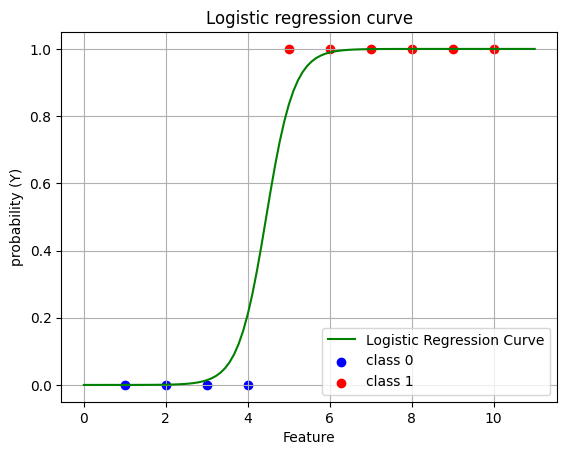

In [ ]:
plt.plot(x_range,y_range,label ='Logistic Regression Curve',color = 'g')
plt.scatter(x[y==0][:,1],y[y==0],label= 'class 0',color = 'b')
plt.scatter(x[y==1][:,1],y[y==1],label= 'class 1',color = 'r')
plt.xlabel('Feature')
plt.ylabel('probability (Y)')
plt.legend()
plt.title('Logistic regression curve')
plt.grid(True)
plt.show()

#Logistic Regression using function

In [ ]:
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/nunnarilabs/ml/master/logistic_regression/insurance_data.csv")
data

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


In [ ]:
data.describe()

,age,bought_insurance
count,27.000000,27.000000
mean,39.666667,0.518519
std,15.745573,0.509175
min,18.000000,0.000000
25%,25.000000,0.000000
50%,45.000000,1.000000
75%,54.500000,1.000000
max,62.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               27 non-null     int64
 1   bought_insurance  27 non-null     int64
dtypes: int64(2)
memory usage: 560.0 bytes


In [ ]:
data["bought_insurance"].unique

<bound method Series.unique of 0     0
1     0
2     1
3     0
4     1
5     1
6     0
7     1
8     1
9     1
10    0
11    0
12    0
13    0
14    1
15    1
16    1
17    1
18    0
19    0
20    0
21    0
22    1
23    1
24    1
25    1
26    0
Name: bought_insurance, dtype: int64>

In [ ]:
data["bought_insurance"].value_counts()

1    14
0    13
Name: bought_insurance, dtype: int64

Assigning x and y

In [ ]:
x = data.drop("bought_insurance",axis = 'columns')

In [ ]:
y = data.bought_insurance

dont need train and test as the values are only limited

import linear model

In [ ]:
from sklearn import linear_model

In [ ]:
model = linear_model.LogisticRegression()

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8)

In [ ]:
print("Total",len(x))
print("Train size",len(x_train))
print("Test size",len(x_test))


Total 27
Train size 21
Test size 6


In [ ]:
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
print(model.coef_)
print(model.intercept_)


[[0.14511677]]
[-5.45664338]


In [ ]:
y_predicted = model.predict(x_test)
y_predicted

array([1, 1, 0, 1, 1, 1])

In [ ]:
print("Test data Score",model.score(x_test,y_test))
print("Train data Score",model.score(x_train,y_train))


Test data Score 0.8333333333333334
Train data Score 0.9047619047619048
